
This dataset captures the delivery time for a set of deliveries. It can be used to analyze the relationship between delivery time and sorting time, helping to understand the efficiency of the delivery process and potentially make improvements based on this data.

In [ ]:
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time (1).csv to delivery_time (1).csv


In [ ]:
df=DataFrame()
df=pd.read_csv('delivery_time (1).csv')

In [ ]:
print(df.head())

   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


In [ ]:
df.shape

(21, 2)

In [ ]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

##Visualize the data set

In [ ]:
df.keys()

Index(['Delivery Time', 'Sorting Time'], dtype='object')

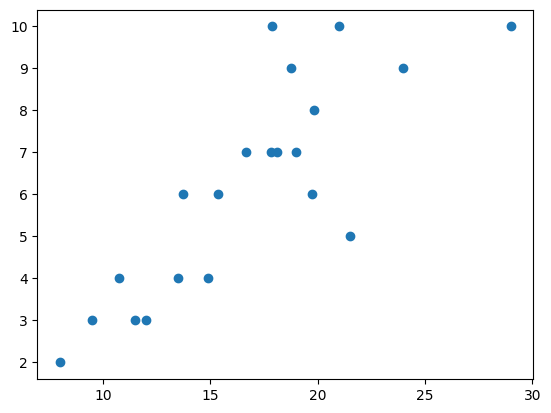

In [ ]:
plt.scatter(df['Delivery Time'], df['Sorting Time'])
plt.show()

In [ ]:
print(df.corr())

               Delivery Time  Sorting Time
Delivery Time       1.000000      0.825997
Sorting Time        0.825997      1.000000


In [ ]:
import seaborn as sns

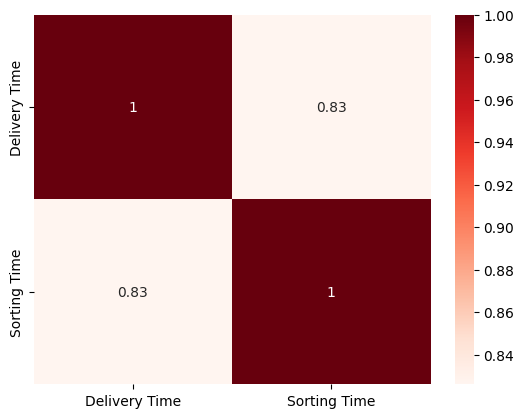

In [ ]:
sns.heatmap(df[['Delivery Time','Sorting Time']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [ ]:
print(df.describe())

       Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000


Simple Linear Regression

In [ ]:

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
print('X shape:', X.shape)
print('y shape:', y.shape)
print('X shape type:', type(X))
print('y shape type:', type(y))

X shape: (21, 1)
y shape: (21,)
X shape type: <class 'pandas.core.frame.DataFrame'>
y shape type: <class 'pandas.core.series.Series'>


In [ ]:
#Wrong Approach
X_wrong = df.iloc[:,-1]
y_wrong = df.iloc[:,-1]

In [ ]:
print('X_wrong shape:', X_wrong.shape , type(X_wrong) )
print('y_wrong shape:', y_wrong.shape , type(y_wrong))

X_wrong shape: (21,) <class 'pandas.core.series.Series'>
y_wrong shape: (21,) <class 'pandas.core.series.Series'>


##Split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
print(X_train)

    Delivery Time
5           15.35
11          10.75
3           24.00
18           8.00
16          13.75
13          11.50
2           19.75
9           18.75
20          21.50
4           29.00
12          16.68
7            9.50
10          19.83
14          12.03
19          17.83
6           19.00


In [ ]:
print(y_train)

5      6
11     4
3      9
18     2
16     6
13     3
2      6
9      9
20     5
4     10
12     7
7      3
10     8
14     3
19     7
6      7
Name: Sorting Time, dtype: int64


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:

regressor.intercept_

-0.3292249777418226

In [ ]:
regressor.coef_

array([0.37522491])

In [ ]:
print(regressor.coef_[0])

0.3752249069825206


In [ ]:

def calc(slope, intercept, hours):
    return slope*hours+intercept

In [ ]:
score = calc(regressor.coef_, regressor.intercept_, 9.5)
print(score)

[3.23541164]


In [ ]:
score = regressor.predict([[9.5]])
print(score)

[3.23541164]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df_preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_preds)

    Actual  Predicted
0       10   7.550498
17       7   6.466098
15       4   5.254122
1        4   4.736311
8       10   6.387301


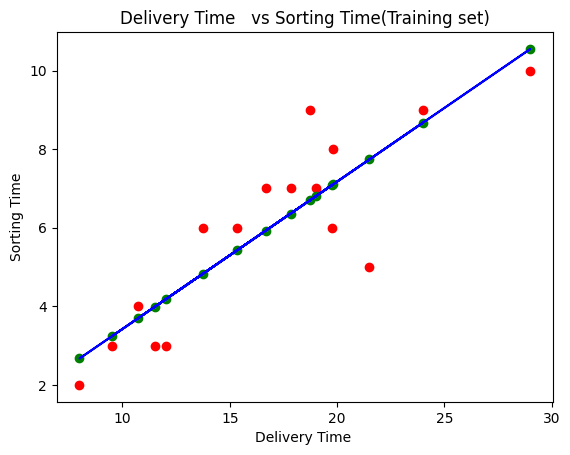

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.scatter(X_train, regressor.predict(X_train), color = 'green')
plt.title('Delivery Time   vs Sorting Time(Training set)')
plt.xlabel('Delivery Time ')
plt.ylabel('Sorting Time')
plt.show()

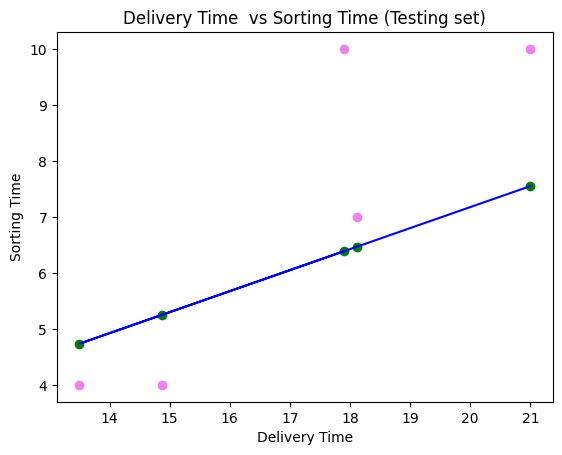

In [ ]:
plt.scatter(X_test, y_test, color = 'violet')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.scatter(X_test, regressor.predict(X_test), color = 'green')
plt.title('Delivery Time  vs Sorting Time (Testing set)')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)